In [27]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']

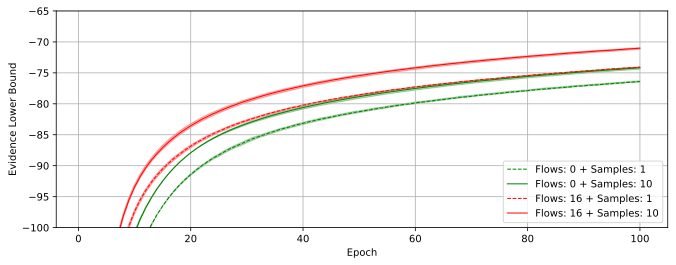

In [32]:
plt.figure(figsize=(11, 4))

for num_flows in [0, 16]:
    
    for num_samples in [1, 10]:
    
        elbos = np.zeros((3, 100))

        for seed in [1, 2, 3]:

            save_path = f"./trained_models/{num_flows}_flows_{num_samples}_samples_{seed}_seed"
            with open(f"{save_path}/elbos", "rb") as fp:
                elbos[seed-1] = np.array(pickle.load(fp))

        elbos_mean = elbos.mean(axis=0)
        elbos_std = elbos.std(axis=0)

        color = "red" if num_flows == 16 else "green"
        linestyle = "-" if num_samples == 10 else "--"
        
        plt.plot(np.arange(1, 101), elbos_mean, linewidth=1, label=f"Flows: {num_flows} + Samples: {num_samples}", color=color, linestyle=linestyle)
        plt.fill_between(np.arange(1, 101), np.max(elbos, axis=0), np.min(elbos, axis=0), alpha=0.3, color=color)
           
plt.xlabel("Epoch")
plt.ylabel("Evidence Lower Bound")
plt.grid()
plt.legend(loc="lower right")
plt.ylim(-100, -65)
plt.show()